### 하이퍼파라미터
* 예측력을 높이기 위해 사용
* 과대/과소 적합을 방지하기 위해 사용
* 사용자가 지정하는 파라미터

#### 하이퍼파라미터 튜닝
* 특정 알고리즘의 매개변수 값을 변경하면서 최적의 파라미터를 찾는 방식
* GridSearchCV클래스를 통해 하이퍼파라미터 탐색과 교차 검증을 한번에 수행

#### GridSearchCV
* 교차 검증으로 하이퍼파라미터 탐색을 수행한다
* 최상의 모델을 찾은 후 훈련 세트 전체를 사용해 최종 모델을 훈련한다
* 매개변수
    - GridSearchCV(모델, param_grid = 파라미터, cv=반복횟수, n_jobs=코어 수(-1, 모든 코어 사용))

### K-최근접 이웃 알고리즘
* 주위에서 가장 가까운 다른 데이터를 보고 현재 데이터를 판단

#### 하이퍼파라미터
* n_neighbors
    - 기본 가까운 5개의 데이터를 보고 자기 자신이 어디에 속하는지를 판단
    - 비교하고자 하는 데이터의 수가 적을 수록 과대 적합이 된다
* metric : 거리계산 척도
    - euclidean(녹색) : 유클리디안 거리 측정
        * 목표 지점까지 가장 짧은 거리
    - manhattan(빨간색) : 맨하튼 거리 측정 방법
        * 찾아가는 경로의 모든 길이의 합
* weights : 가중치
    - uniform : 거리에 가중치 부여하지 않음(균일한 가중치)
    - distance : 거리에 가중치 부여(가까이 있는 데이터에 가중치)

<img src="../images/거리척도.png" width="500" height="500" />

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../data_set/5.스케일링/titanic_cleaning.csv")
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [4]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare']
label = 'Survived'
X, y = df[features], df[label]

In [5]:
minMaxScaler = MinMaxScaler()
minMaxScaler.fit(X)
X_scaler = minMaxScaler.transform(X)

In [6]:
X_train_minMax, X_test_minMax, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2)

In [8]:
knn = KNeighborsClassifier()
knn.fit(X_train_minMax, y_train)
print("train : ", knn.score(X_train_minMax, y_train))
print("test  : ", knn.score(X_test_minMax, y_test))

train :  0.8679775280898876
test  :  0.7653631284916201


In [13]:
k_param = range(1, 11)
train_list = []
test_list = []
for k in k_param:
    knn = KNeighborsClassifier(n_neighbors=k)
    # n_neighbors : 볼 데이터의 개수, 기본 5개 
    knn.fit(X_train_minMax, y_train)
    #print("k : ", k, "| train : ", knn.score(X_train_minMax, y_train), "| test: ", knn.score(X_test_minMax, y_test) )
    train_list.append(knn.score(X_train_minMax, y_train))
    test_list.append(knn.score(X_test_minMax, y_test))
dic = {
    "k" : k_param, 
    "train정확도" : train_list, 
    "test 정확도" : test_list
}
score_df = pd.DataFrame(dic)
score_df

,k,train정확도,test 정확도
0,1,0.984551,0.770950
1,2,0.904494,0.770950
2,3,0.890449,0.776536
3,4,0.873596,0.782123
4,5,0.867978,0.765363
5,6,0.865169,0.770950
6,7,0.859551,0.748603
7,8,0.863764,0.748603
8,9,0.859551,0.748603
9,10,0.842697,0.737430


<Axes: xlabel='k', ylabel='train정확도'>

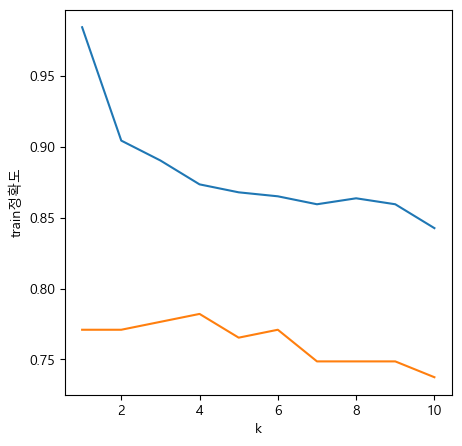

In [15]:
# 시각화 
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", family="Malgun Gothic")

#plt.rcParams["figure.figsize"] = (5, 3)
fig, ax = plt.subplots(figsize = (5, 5) )
sns.lineplot(x="k", y="train정확도", data=score_df)
sns.lineplot(x="k", y="test 정확도", data=score_df)

In [16]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_neighbors" : k_param
}
knn = KNeighborsClassifier()

grid_cv = GridSearchCV(knn, param_grid=params, cv=5, n_jobs=-1) 
# 학습할 모델 객체, 탐색할 하이퍼파라미터 값들의 조합을 딕셔너리 형태로 지정, 교차 검증을 위한 폴드 수 (기본값은 5),  병렬 처리를 위한 CPU 코어 수 (-1은 모든 코어 사용)
grid_cv.fit(X_train_minMax, y_train)
print("최적의 하이퍼 파라미터 : ", grid_cv.best_params_)

print(grid_cv.score(X_train_minMax, y_train))
print(grid_cv.score(X_test_minMax, y_test))

최적의 하이퍼 파라미터 :  {'n_neighbors': 2}
0.9044943820224719
0.770949720670391


In [18]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_neighbors" : range(1, 11),
    "metric" : ["manhattan", "enclidean"],
    "weights" : ["uniform", "distance"]
}
knn = KNeighborsClassifier()

grid_cv = GridSearchCV(knn, param_grid=params, cv=5, n_jobs=-1) 
grid_cv.fit(X_train_minMax, y_train)
print("최적의 하이퍼 파라미터 : ", grid_cv.best_params_)

print(grid_cv.score(X_train_minMax, y_train))
print(grid_cv.score(X_test_minMax, y_test))

최적의 하이퍼 파라미터 :  {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
0.8693820224719101
0.7541899441340782


In [20]:
# 위에 결과에 맞는 최적의 하이퍼 파라미터 사용하기
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='uniform')
knn.fit(X_train_minMax, y_train)

print(knn.score(X_train_minMax, y_train))
print(knn.score(X_test_minMax, y_test))

0.8693820224719101
0.7541899441340782


### 랜덤 포레스트 하이퍼 파라미터
* n_estimators
    - 트리의 개수. default=10
    - 트리의 개수가 많이면 성능은 좋아지지만, 시간이 오래 걸릴수 있다.
* max_depth
    - 트리의 최대 깊이. default = None
    - 완벽하게 파라미터값이 결정될 때 까지 분할 또는 min_samples_split보자 작아질 때까지 분할
    - 깊이가 깊어지면 과대적합될 수 있으므로 적절히 제어 필요
* min_samples_leaf
    - 맆노드(자식노드가 없는 노드)가 되기 위해 최소한의 샘플 데이터 수
    - min_samples_split과 함께 과대적합 제어용도
    - 불균형 데이터가 있는 경우 작게 설정하는게 좋다

<img src="../images/랜덤포레스트.png" width="500" height="500" />

In [22]:
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('../data_set/5.스케일링/titanic_cleaning.csv')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500


In [23]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [24]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
label = 'Survived'
X, y = df[features], df[label]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print("train : " , rfc.score(X_train, y_train))
print("test  : " , rfc.score(X_test, y_test))

train :  0.9901685393258427
test  :  0.8212290502793296


In [32]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=1000, min_samples_leaf=10)
rfc.fit(X_train, y_train)
print("train : " , rfc.score(X_train, y_train))
print("test  : " , rfc.score(X_test, y_test))

train :  0.8595505617977528
test  :  0.7988826815642458


In [34]:
params = {
    "n_estimators" : range(10, 101, 10),
    "max_depth" :  range(4, 11, 2), 
    "min_samples_leaf" :  range(5, 21, 5)
}

rfc = RandomForestClassifier()

grid_cv = GridSearchCV(rfc, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_train, y_train)
print("최적의 하이퍼파라미터 : ", grid_cv.best_params_)
print("train : ", grid_cv.score(X_train, y_train))
print("test  : ", grid_cv.score(X_test, y_test))

최적의 하이퍼파라미터 :  {'max_depth': 8, 'min_samples_leaf': 5, 'n_estimators': 60}
train :  0.8778089887640449
test  :  0.8100558659217877


In [37]:
# 위에 결과에 맞는 최적의 하이퍼 파라미터 사용하기
rfc = RandomForestClassifier(max_depth=8, min_samples_leaf=5, n_estimators=60)
rfc.fit(X_train_minMax, y_train)

print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.6137640449438202
0.6312849162011173


In [35]:
grid_cv.predict( X_train )

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### 하이퍼파라미터
* n_estimators
    - 학습기의 수 설정.
    - 많으면 예측률은 올라가나 시간이 오래걸릴 수 있음.
* learning_rate
    - GBM이 학습을 진행할 때마다 적용하는 학습률로서 순차적으로 오류 값을 보정해가는 데 적용하는 수 이다
    - 0~1 사이의 값으로 지정한다. default=0.1
    - 너무 작은 값이면 업데이트를 너무 많이 하게 되어 꼼꼼하지만 시간이 오래 걸린다
    - 너무 큰 값이면 최소 오류 값을 찾지 못할 수 있지만 빠르다
* subsample
    - 학습기가 학습에 사용하는 데이터 샘플의 비율(0~1). default=1.
    - 0.5일경우 50%학습데이터를 사용한다는 것이다
    - 과대적합을 줄이려면 작은 값을 적용해야 한다.

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
print("train : ", gb.score(X_train, y_train))
print("test  : ", gb.score(X_test, y_test))

train :  0.9087078651685393
test  :  0.8156424581005587


In [41]:
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=0.9)
gb.fit(X_train, y_train)
print("train : ", gb.score(X_train, y_train))
print("test  : ", gb.score(X_test, y_test))

train :  0.9073033707865169
test  :  0.8268156424581006


In [44]:
import numpy as np
params = {
    "learning_rate" : [0.1, 0.3, 0.5, 0.7, 0.9], #np.arange(0.1, 1, 0.2)
    "n_estimators" : [100, 200, 300, 400, 500],  #range(100, 500, 100)
    "subsample" : np.arange(0.1, 1, 0.2)
}
gb = GradientBoostingClassifier()

grid_cv = GridSearchCV(gb, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_train, y_train)
print("파라미터 : " , grid_cv.best_params_)
print("train : ", grid_cv.score(X_train, y_train))
print("test  : ", grid_cv.score(X_test, y_test))

파라미터 :  {'learning_rate': 0.1, 'n_estimators': 100, 'subsample': 0.7000000000000001}
train :  0.9101123595505618
test  :  0.8379888268156425


In [43]:
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=0.7000000000000001)
gb.fit(X_train, y_train)
print("train : ", gb.score(X_train, y_train))
print("test  : ", gb.score(X_test, y_test))

train :  0.9002808988764045
test  :  0.8379888268156425
